In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc
from sklearn.model_selection import KFold

import statsmodels.formula.api as smf
import statsmodels.api as sm


from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import itertools as it

#Libraries for visualizing trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import time as time

In [188]:
data = pd.read_csv("data3.csv")

# Visualizing response/predictor distributions and cleaning datatypes

In [190]:
data["price"] = data["price"].replace("[$,]", "", regex=True)

In [191]:
data["price"] = pd.to_numeric(data["price"])

In [192]:
data['price'].sort_values(ascending = False)

2563    10000.0
971      9999.0
3093     9999.0
2938     9000.0
5869     5000.0
         ...   
2515       11.0
2041       11.0
4431       10.0
4096        0.0
3847        0.0
Name: price, Length: 6544, dtype: float64

In [193]:
data['price'].describe()

count     6544.000000
mean       168.053943
std        319.139001
min          0.000000
25%         72.000000
50%        113.000000
75%        178.000000
max      10000.000000
Name: price, dtype: float64

In [194]:
data.loc[data['price'] == 9999.0]

,id,name,description,neighborhood_overview,host_id,host_name,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,Shared patio or balcony,Hair dryer,Stove,Breakfast,Private patio or balcony,Full kitchen,Lockbox,Security cameras on property,Hot tub,Heating
971,15287352,Wrigleyville Mansion - Sleeps 16+,Wrigleyville Mansion is the perfect place to h...,- Wrigley Field<br />- Southport Corridor<br /...,45401863,Joe,100%,100%,t,Lakeview,...,0,1,1,0,0,0,1,0,0,1
3093,36668214,Steps from Mag Mile -Suite in Boutique Hotel,The sophisticated design of the St. Jane King ...,"Located in the heart of Chicago, steps away fr...",265201380,St Jane,0%,68%,f,Loop,...,0,1,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Distribution of price per night')

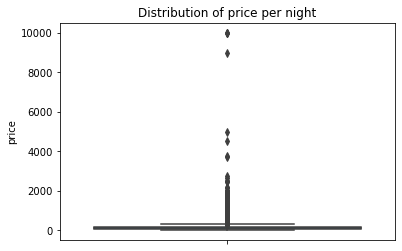

In [195]:
sns.boxplot(data=data, y='price')
plt.title('Distribution of price per night')

Text(0.5, 1.0, 'Distribution of price per night')

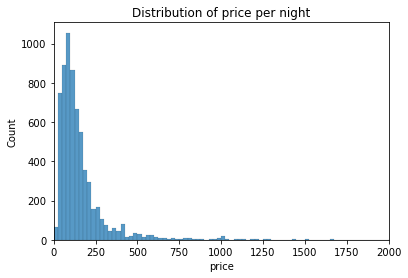

In [196]:
ax = sns.histplot(data=data, x="price", binwidth = 25)
ax.set_xlim(0, 2000)
plt.title('Distribution of price per night')

In [197]:
data['review_scores_rating'].describe()

count    5452.000000
mean        4.711669
std         0.516981
min         0.000000
25%         4.660000
50%         4.840000
75%         4.970000
max         5.000000
Name: review_scores_rating, dtype: float64

Text(0.5, 1.0, 'Distribution of review scores')

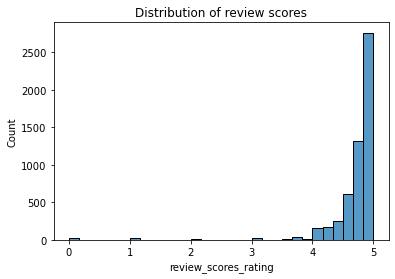

In [198]:
ax = sns.histplot(data=data, x="review_scores_rating", bins = 30)
plt.title('Distribution of review scores')

In [199]:
data['y'] = data['review_scores_rating'] >= data['review_scores_rating'].median()
data['y'] = data.y.astype(int)

In [200]:
data['y'].describe()

count    6544.000000
mean        0.421913
std         0.493903
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: y, dtype: float64

In [201]:
data['y'].value_counts()

0    3783
1    2761
Name: y, dtype: int64

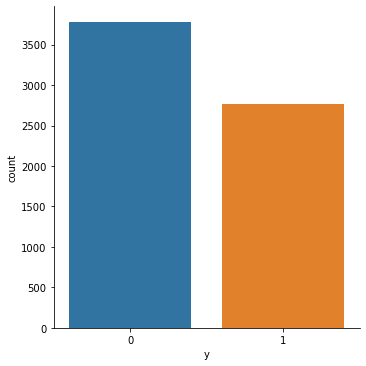

In [202]:
sns.catplot(x="y", kind="count", data=data)

In [203]:
data["host_response_rate"] = data["host_response_rate"].replace("[%]", "", regex=True)

In [204]:
data["host_response_rate"] = pd.to_numeric(data["host_response_rate"])

In [205]:
data['host_response_rate'].describe()

count    5037.000000
mean       95.520151
std        15.991330
min         0.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: host_response_rate, dtype: float64

Text(0.5, 1.0, 'Distribution of host response rates')

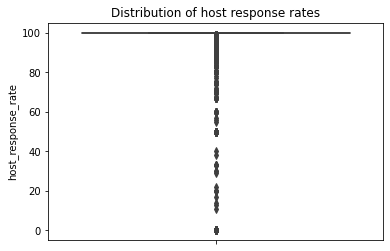

In [206]:
sns.boxplot(data=data, y='host_response_rate')
plt.title('Distribution of host response rates')

Text(0.5, 1.0, 'Distribution of host response rates')

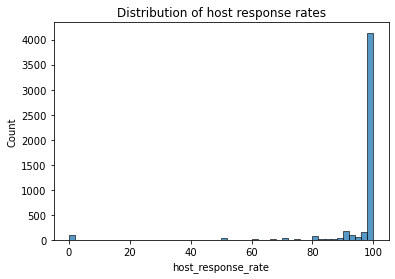

In [207]:
ax = sns.histplot(data=data, x="host_response_rate", bins = 50)
plt.title('Distribution of host response rates')

In [208]:
data["host_acceptance_rate"] = data["host_acceptance_rate"].replace("[%]", "", regex=True)

In [209]:
data["host_acceptance_rate"] = pd.to_numeric(data["host_acceptance_rate"])

In [210]:
data['host_acceptance_rate'].describe()

count    5266.000000
mean       85.360805
std        23.540111
min         0.000000
25%        81.000000
50%        96.000000
75%       100.000000
max       100.000000
Name: host_acceptance_rate, dtype: float64

Text(0.5, 1.0, 'Distribution of host acceptance rates')

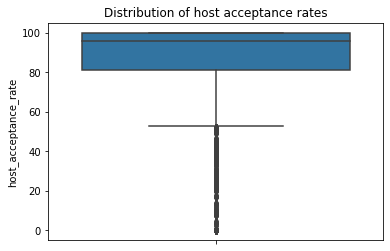

In [211]:
sns.boxplot(data=data, y='host_acceptance_rate')
plt.title('Distribution of host acceptance rates')

Text(0.5, 1.0, 'Distribution of host acceptance rates')

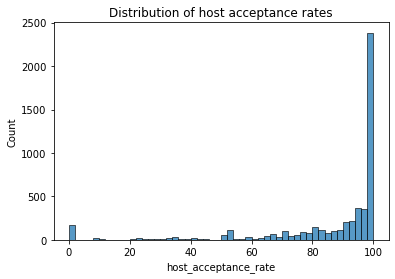

In [212]:
ax = sns.histplot(data=data, x="host_acceptance_rate", bins = 50)
plt.title('Distribution of host acceptance rates')

In [213]:
data['host_is_superhost'].replace({'f': 0, 't': 1}, inplace=True)

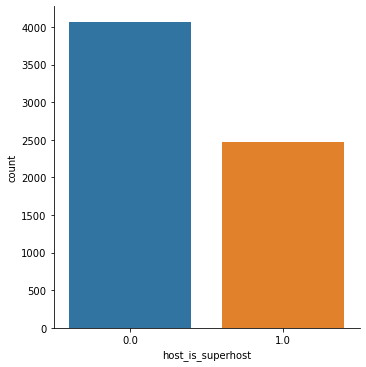

In [214]:
sns.catplot(x="host_is_superhost", kind="count", data=data)

In [215]:
data['host_neighbourhood'].describe()

count          6074
unique          174
top       Cambridge
freq            357
Name: host_neighbourhood, dtype: object

In [216]:
data['host_verifications'].describe()

count                   6544
unique                   240
top       ['email', 'phone']
freq                     860
Name: host_verifications, dtype: object

In [217]:
data['host_identity_verified'].replace({'f': 0, 't': 1}, inplace=True)

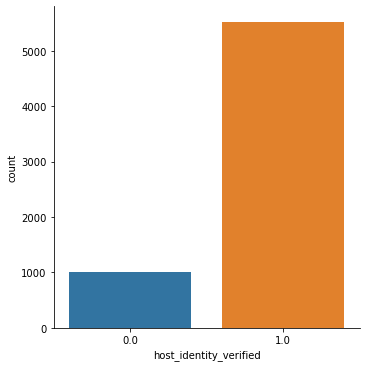

In [218]:
sns.catplot(x="host_identity_verified", kind="count", data=data)

In [219]:
data['host_neighbourhood'].value_counts()

Cambridge       357
Logan Square    308
River North     267
Lakeview        251
Lincoln Park    183
               ... 
Fort Greene       1
Zephyr Cove       1
Big Oaks          1
Chapmantown       1
Sauganash         1
Name: host_neighbourhood, Length: 174, dtype: int64

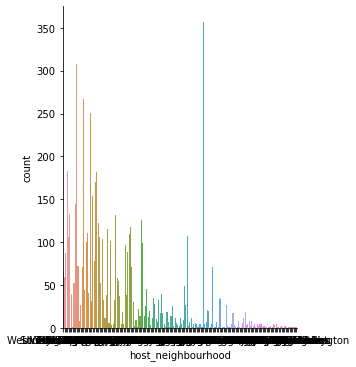

In [220]:
sns.catplot(x="host_neighbourhood", kind="count", data=data)

In [221]:
data['neighbourhood_cleansed'].value_counts()

Near North Side    760
West Town          709
Lake View          561
Near West Side     407
Logan Square       398
                  ... 
Edison Park          1
Burnside             1
West Elsdon          1
Gage Park            1
Avalon Park          1
Name: neighbourhood_cleansed, Length: 76, dtype: int64

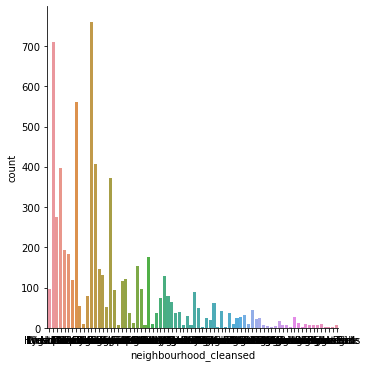

In [222]:
sns.catplot(x="neighbourhood_cleansed", kind="count", data=data)

In [223]:
data['property_type'].value_counts()

Entire rental unit                     3093
Entire condominium (condo)              723
Private room in rental unit             620
Private room in residential home        470
Entire residential home                 379
Private room in condominium (condo)     203
Entire guest suite                      172
Entire serviced apartment               122
Room in boutique hotel                  119
Entire loft                             109
Entire townhouse                         94
Private room in townhouse                63
Shared room in rental unit               43
Private room in bungalow                 42
Room in hotel                            41
Entire guesthouse                        39
Private room in loft                     28
Shared room in residential home          27
Private room in guest suite              23
Private room in bed and breakfast        16
Shared room in condominium (condo)       13
Room in serviced apartment               13
Entire bungalow                 

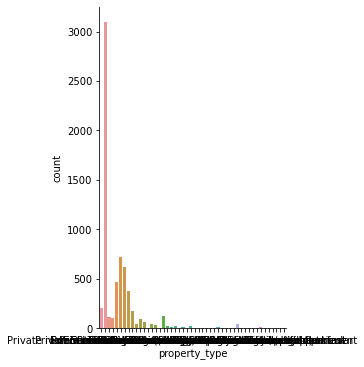

In [224]:
sns.catplot(x="property_type", kind="count", data=data)

In [225]:
data['room_type'].value_counts()

Entire home/apt    4763
Private room       1631
Shared room          89
Hotel room           61
Name: room_type, dtype: int64

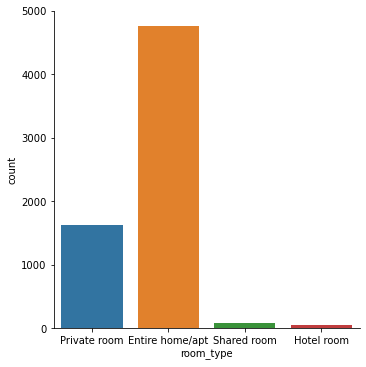

In [226]:
sns.catplot(x="room_type", kind="count", data=data)

In [227]:
data['accommodates'].describe()

count    6544.000000
mean        4.139976
std         2.870259
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        16.000000
Name: accommodates, dtype: float64

In [228]:
data['accommodates'].value_counts()

2     2197
4     1397
6      804
3      501
1      420
5      362
8      287
7      140
10     137
16     100
12      92
9       48
14      29
13      13
11      11
15       5
0        1
Name: accommodates, dtype: int64

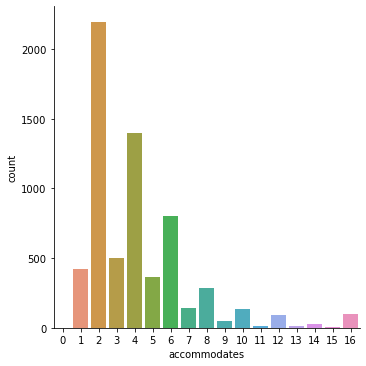

In [229]:
sns.catplot(x="accommodates", kind="count", data=data)

In [230]:
data['Bathrooms'].describe()

count     6530
unique      23
top          1
freq      4511
Name: Bathrooms, dtype: object

In [231]:
data['Bathrooms'].value_counts()

1            4511
2            1176
1.5           297
2.5           193
3             144
3.5            71
4              58
4.5            21
0              14
5              12
6              10
11              4
Shared          3
7               3
Private         3
6.5             2
Half-bath       2
8               1
5.5             1
7.5             1
12.5            1
11.5            1
10              1
Name: Bathrooms, dtype: int64

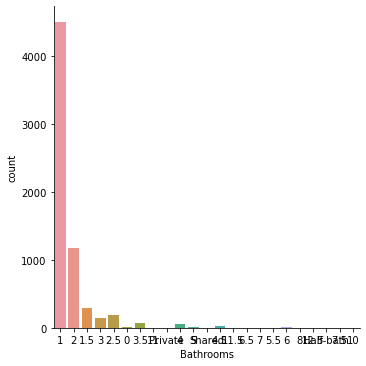

In [232]:
sns.catplot(x="Bathrooms", kind="count", data=data)

In [233]:
data['bedrooms'].describe()

count    5965.000000
mean        1.790780
std         1.096217
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: bedrooms, dtype: float64

In [234]:
data['bedrooms'].value_counts()

1.0     3121
2.0     1635
3.0      816
4.0      255
5.0       73
6.0       35
7.0       13
8.0        8
9.0        4
12.0       3
11.0       1
10.0       1
Name: bedrooms, dtype: int64

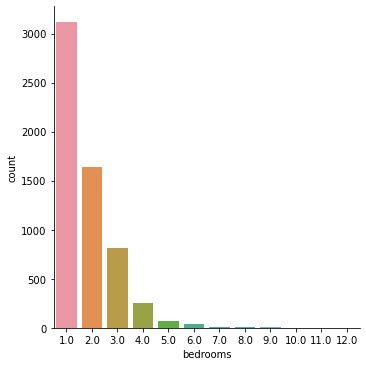

In [235]:
sns.catplot(x="bedrooms", kind="count", data=data)

In [236]:
data['beds'].describe()

count    6345.000000
mean        2.187707
std         1.717310
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        25.000000
Name: beds, dtype: float64

In [237]:
data['beds'].value_counts()

1.0     2799
2.0     1712
3.0      924
4.0      457
5.0      192
6.0      102
7.0       49
8.0       33
9.0       27
10.0      14
12.0       9
11.0       9
13.0       5
14.0       4
20.0       2
16.0       2
15.0       1
25.0       1
17.0       1
18.0       1
21.0       1
Name: beds, dtype: int64

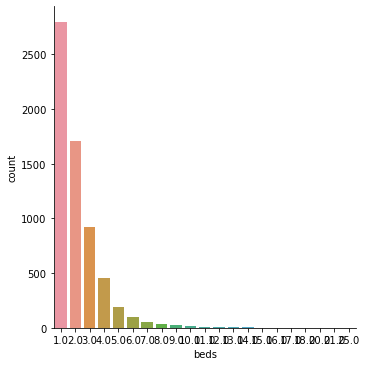

In [238]:
sns.catplot(x="beds", kind="count", data=data)

In [239]:
data['minimum_nights'].describe()

count    6544.000000
mean        9.343062
std        22.169276
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       500.000000
Name: minimum_nights, dtype: float64

In [240]:
data['minimum_nights'].value_counts()

2      2148
1      1830
3       752
32      530
30      390
4       180
5       132
7       122
60       57
31       48
28       38
10       37
14       36
33       30
6        22
41       22
90       21
25       19
20       18
15       15
21       11
180       9
35        9
365       8
29        7
36        4
40        4
45        4
50        3
120       3
300       3
12        3
13        3
27        3
23        2
121       2
39        2
200       2
182       1
24        1
250       1
80        1
150       1
70        1
38        1
500       1
140       1
185       1
61        1
8         1
168       1
9         1
75        1
Name: minimum_nights, dtype: int64

<AxesSubplot:ylabel='minimum_nights'>

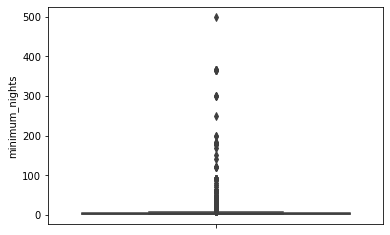

In [241]:
sns.boxplot(data=data, y='minimum_nights')

(0.0, 100.0)

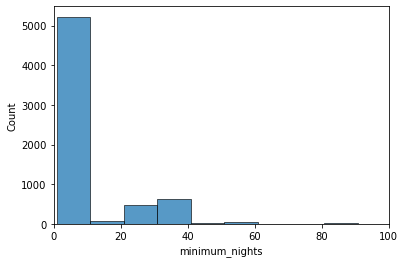

In [242]:
ax = sns.histplot(data=data, x="minimum_nights", bins = 50)
ax.set_xlim(0, 100)

In [243]:
data['maximum_nights'].describe()

count    6544.000000
mean      696.093215
std       501.635043
min         1.000000
25%        70.000000
50%      1125.000000
75%      1125.000000
max      1125.000000
Name: maximum_nights, dtype: float64

In [244]:
data['maximum_nights'].value_counts()

1125    3533
365      575
30       313
28       225
90       152
        ... 
34         1
92         1
124        1
336        1
110        1
Name: maximum_nights, Length: 128, dtype: int64

<AxesSubplot:ylabel='maximum_nights'>

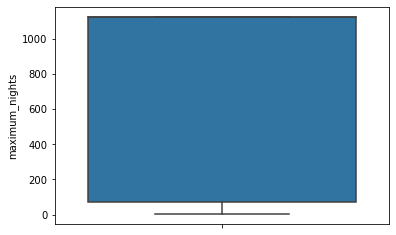

In [245]:
sns.boxplot(data=data, y='maximum_nights')

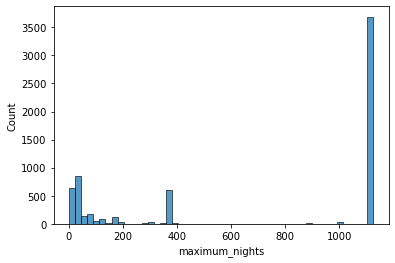

In [246]:
ax = sns.histplot(data=data, x="maximum_nights", bins = 50)

In [247]:
data['availability_365'].describe()

count    6544.000000
mean      187.835116
std       136.249358
min         0.000000
25%        68.000000
50%       173.000000
75%       337.000000
max       365.000000
Name: availability_365, dtype: float64

<AxesSubplot:ylabel='availability_365'>

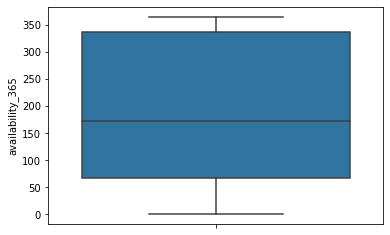

In [248]:
sns.boxplot(data=data, y='availability_365')

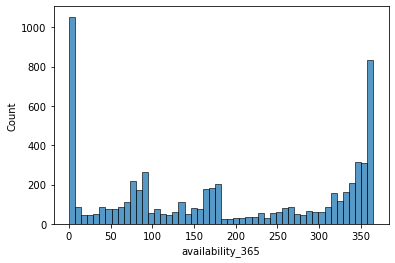

In [249]:
ax = sns.histplot(data=data, x="availability_365", bins = 50)

In [250]:
data['number_of_reviews'].describe()

count    6544.000000
mean       46.102689
std        75.744629
min         0.000000
25%         2.000000
50%        16.000000
75%        56.000000
max      1569.000000
Name: number_of_reviews, dtype: float64

<AxesSubplot:ylabel='number_of_reviews'>

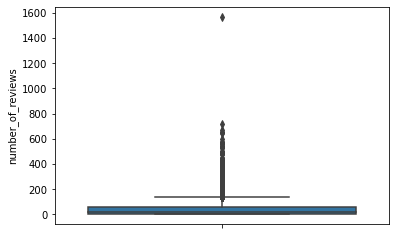

In [251]:
sns.boxplot(data=data, y='number_of_reviews')

(0.0, 200.0)

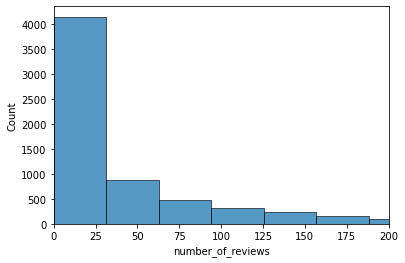

In [252]:
ax = sns.histplot(data=data, x="number_of_reviews", bins = 50)
ax.set_xlim(0, 200)

In [253]:
data['number_of_reviews_ltm'].describe()

count    6544.000000
mean       12.981663
std        24.008321
min         0.000000
25%         0.000000
50%         4.000000
75%        20.000000
max      1077.000000
Name: number_of_reviews_ltm, dtype: float64

<AxesSubplot:ylabel='number_of_reviews_ltm'>

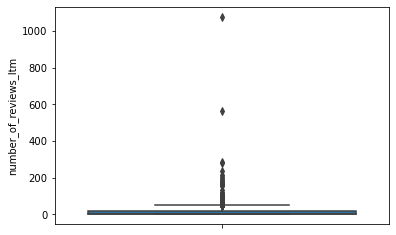

In [254]:
sns.boxplot(data=data, y='number_of_reviews_ltm')

(0.0, 100.0)

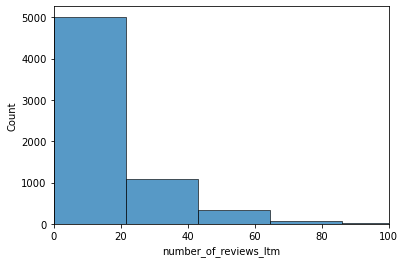

In [255]:
ax = sns.histplot(data=data, x="number_of_reviews_ltm", bins = 50)
ax.set_xlim(0, 100)

In [256]:
data['number_of_reviews_l30d'].describe()

count    6544.000000
mean        1.001987
std         2.202807
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       105.000000
Name: number_of_reviews_l30d, dtype: float64

<AxesSubplot:ylabel='number_of_reviews_l30d'>

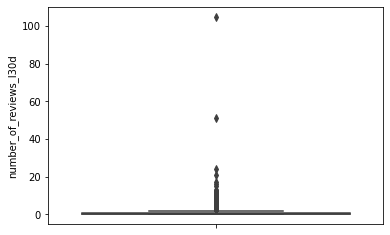

In [257]:
sns.boxplot(data=data, y='number_of_reviews_l30d')

(0.0, 20.0)

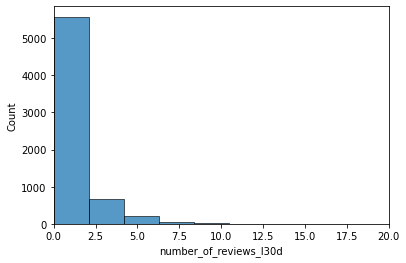

In [258]:
ax = sns.histplot(data=data, x="number_of_reviews_l30d", bins = 50)
ax.set_xlim(0, 20)

In [259]:
data['reviews_per_month'].describe()

count    5452.000000
mean        1.826291
std         1.879824
min         0.010000
25%         0.450000
50%         1.310000
75%         2.790000
max        41.770000
Name: reviews_per_month, dtype: float64

<AxesSubplot:ylabel='reviews_per_month'>

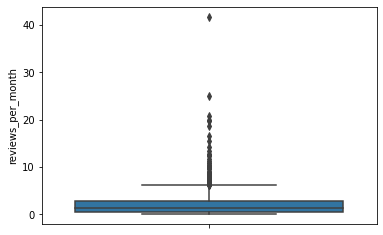

In [260]:
sns.boxplot(data=data, y='reviews_per_month')

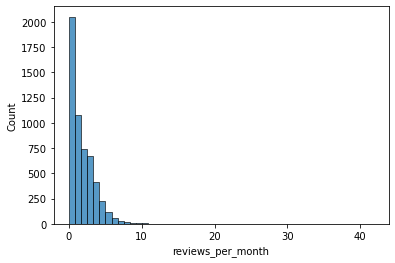

In [261]:
ax = sns.histplot(data=data, x="reviews_per_month", bins = 50)

In [262]:
data['instant_bookable'].replace({'f': 0, 't': 1}, inplace=True)

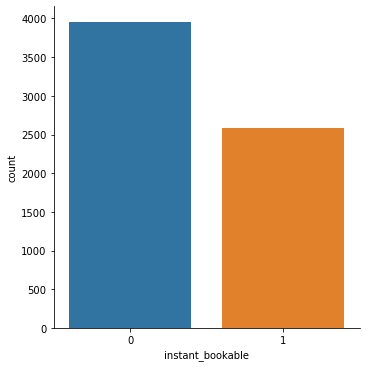

In [263]:
sns.catplot(x="instant_bookable", kind="count", data=data)

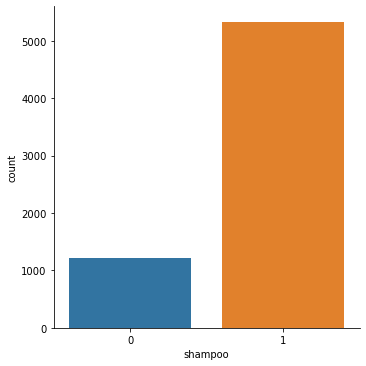

In [264]:
sns.catplot(x="shampoo", kind="count", data=data)

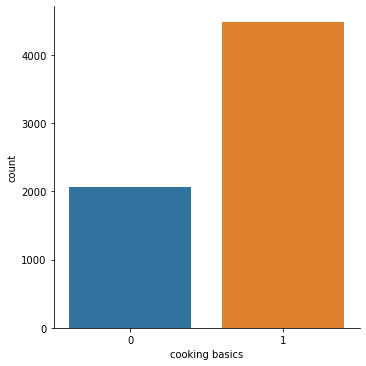

In [265]:
sns.catplot(x="cooking basics", kind="count", data=data)

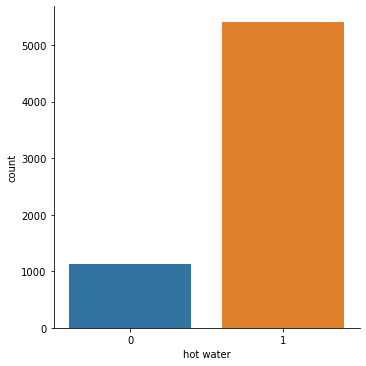

In [266]:
sns.catplot(x="hot water", kind="count", data=data)

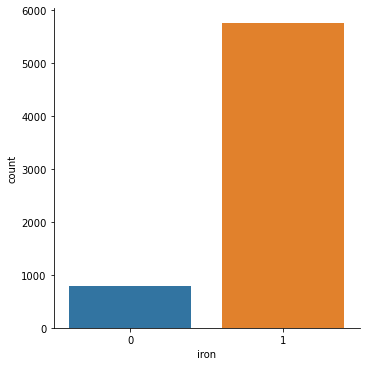

In [267]:
sns.catplot(x="iron", kind="count", data=data)

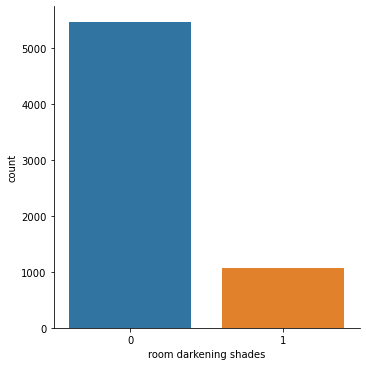

In [268]:
sns.catplot(x="room darkening shades", kind="count", data=data)

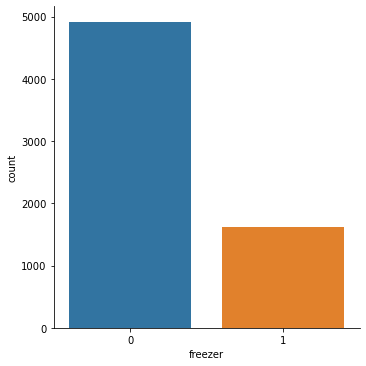

In [269]:
sns.catplot(x="freezer", kind="count", data=data)

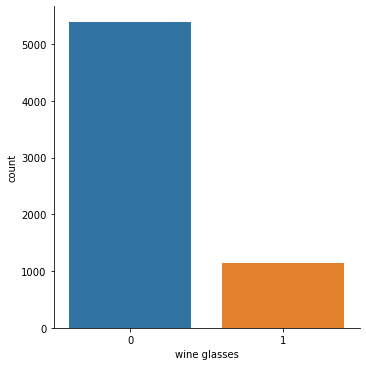

In [270]:
sns.catplot(x="wine glasses", kind="count", data=data)

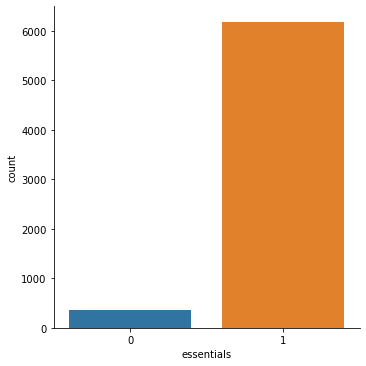

In [271]:
sns.catplot(x="essentials", kind="count", data=data)

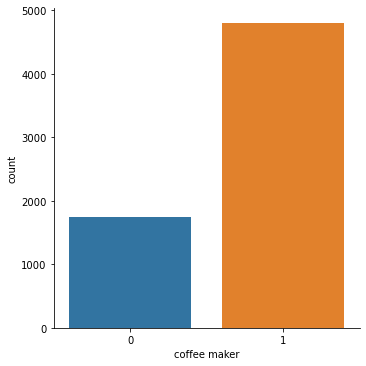

In [272]:
sns.catplot(x="coffee maker", kind="count", data=data)

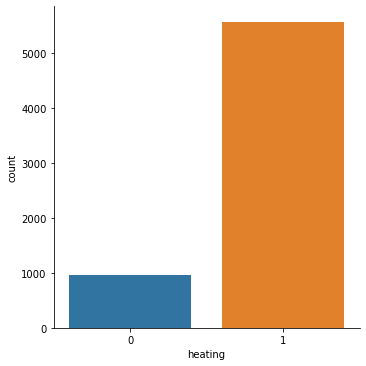

In [273]:
sns.catplot(x="heating", kind="count", data=data)

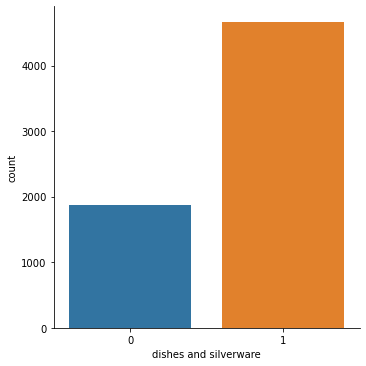

In [274]:
sns.catplot(x="dishes and silverware", kind="count", data=data)

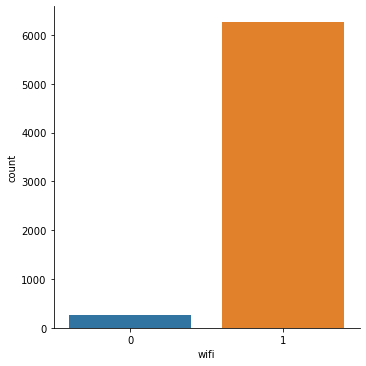

In [275]:
sns.catplot(x="wifi", kind="count", data=data)

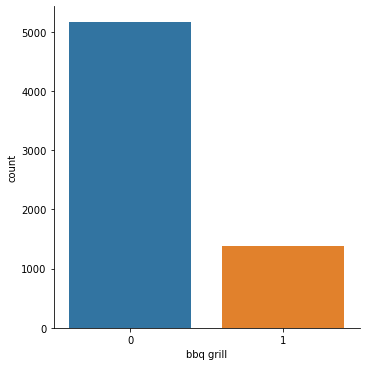

In [276]:
sns.catplot(x="bbq grill", kind="count", data=data)

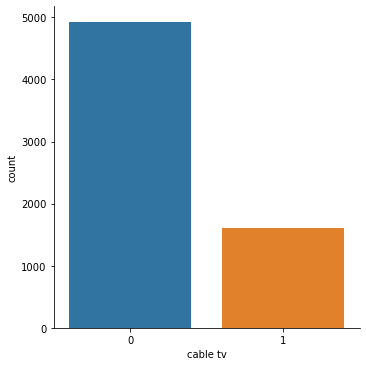

In [277]:
sns.catplot(x="cable tv", kind="count", data=data)

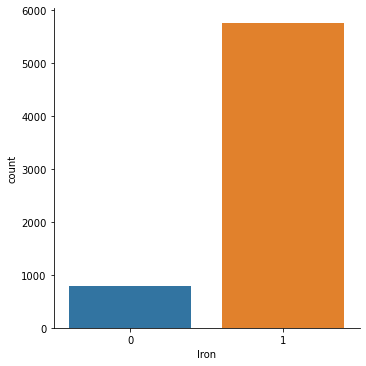

In [278]:
sns.catplot(x="Iron", kind="count", data=data)

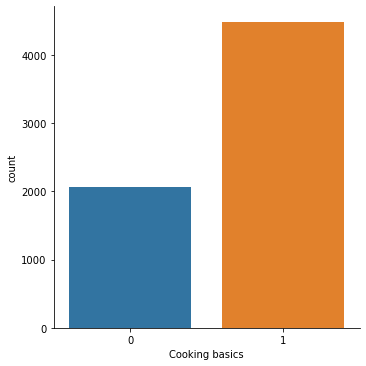

In [279]:
sns.catplot(x="Cooking basics", kind="count", data=data)

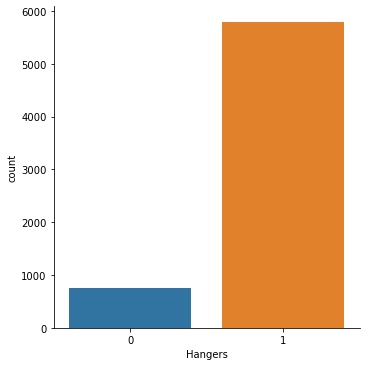

In [280]:
sns.catplot(x="Hangers", kind="count", data=data)

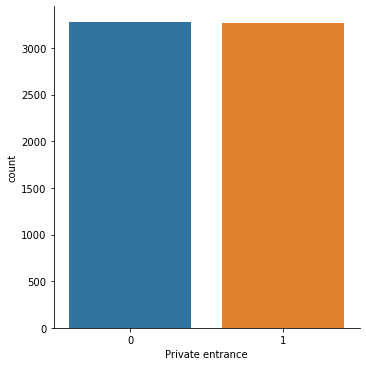

In [281]:
sns.catplot(x="Private entrance", kind="count", data=data)

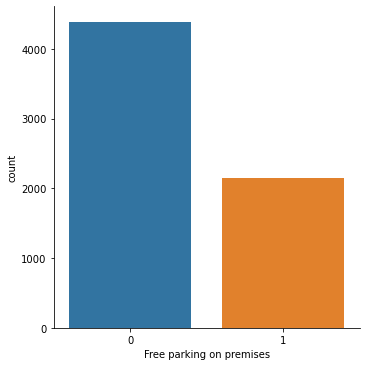

In [282]:
sns.catplot(x="Free parking on premises", kind="count", data=data)

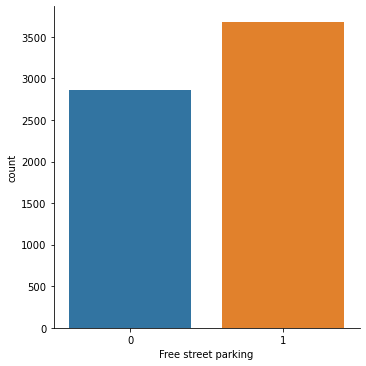

In [283]:
sns.catplot(x="Free street parking", kind="count", data=data)

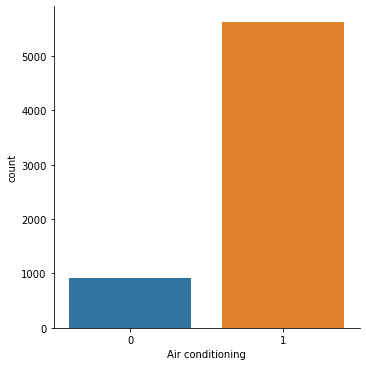

In [284]:
sns.catplot(x="Air conditioning", kind="count", data=data)

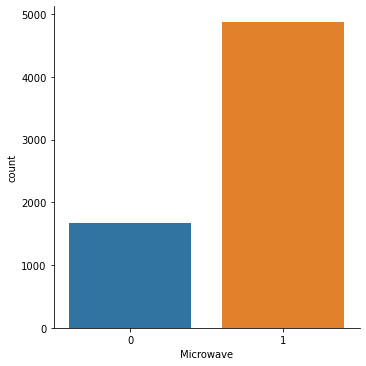

In [285]:
sns.catplot(x="Microwave", kind="count", data=data)

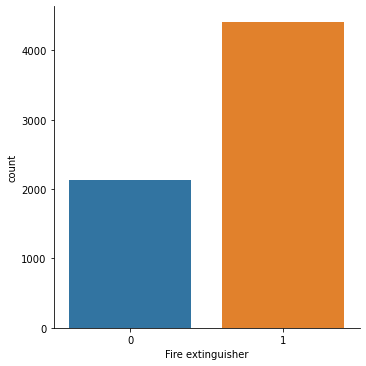

In [286]:
sns.catplot(x="Fire extinguisher", kind="count", data=data)

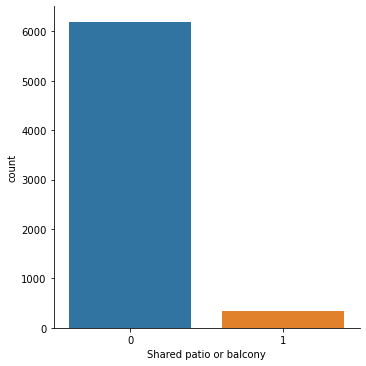

In [287]:
sns.catplot(x="Shared patio or balcony", kind="count", data=data)

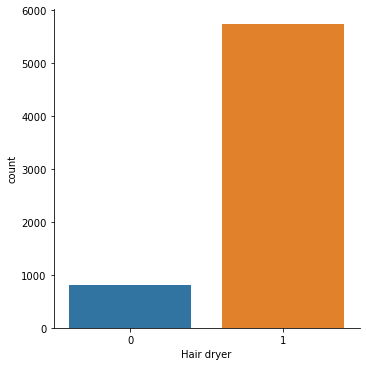

In [288]:
sns.catplot(x="Hair dryer", kind="count", data=data)

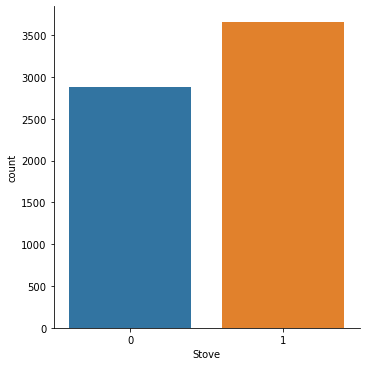

In [289]:
sns.catplot(x="Stove", kind="count", data=data)

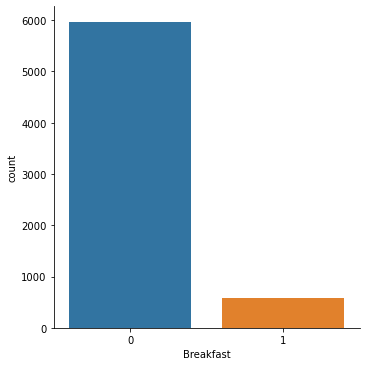

In [290]:
sns.catplot(x="Breakfast", kind="count", data=data)

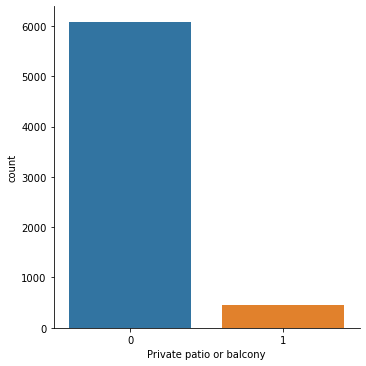

In [291]:
sns.catplot(x="Private patio or balcony", kind="count", data=data)

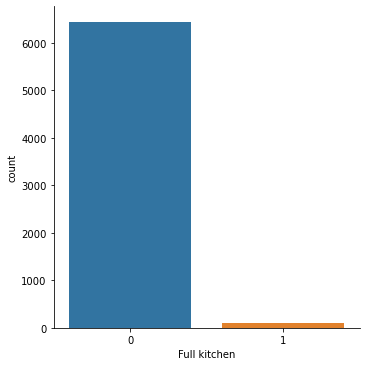

In [292]:
sns.catplot(x="Full kitchen", kind="count", data=data)

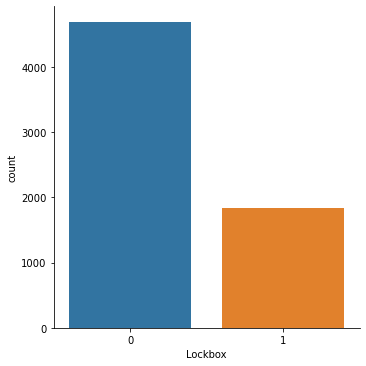

In [293]:
sns.catplot(x="Lockbox", kind="count", data=data)

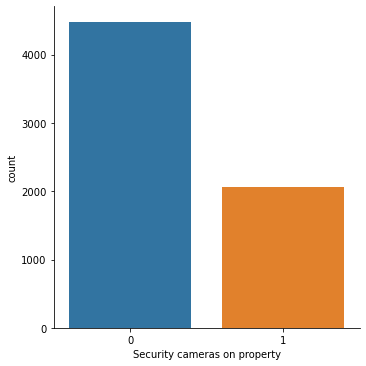

In [294]:
sns.catplot(x="Security cameras on property", kind="count", data=data)

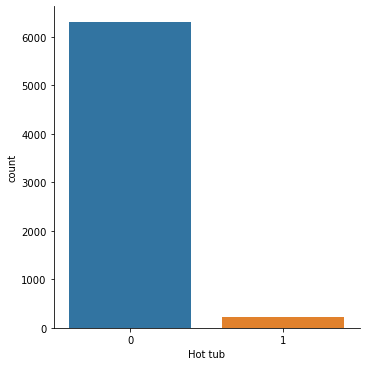

In [295]:
sns.catplot(x="Hot tub", kind="count", data=data)

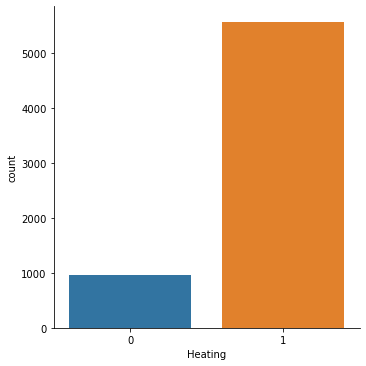

In [296]:
sns.catplot(x="Heating", kind="count", data=data)

In [297]:
data.to_csv('data4.csv', index=False)

# SCATTERPLOTS

<AxesSubplot:xlabel='price', ylabel='y'>

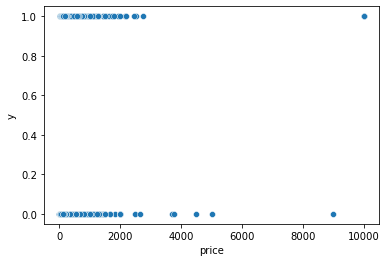

In [298]:
sns.scatterplot(data = data, x = "price",y="y")

<AxesSubplot:xlabel='host_response_rate', ylabel='y'>

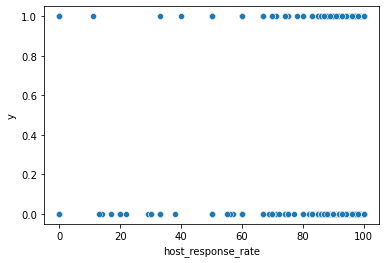

In [299]:
sns.scatterplot(data = data, x = "host_response_rate",y="y")

<AxesSubplot:xlabel='host_acceptance_rate', ylabel='y'>

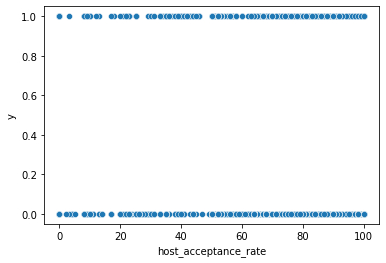

In [300]:
sns.scatterplot(data = data, x = "host_acceptance_rate",y="y")

<AxesSubplot:xlabel='host_is_superhost', ylabel='y'>

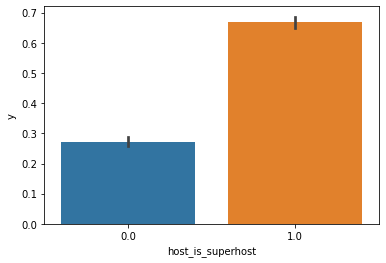

In [301]:
sns.barplot(x = 'host_is_superhost', y = 'y', data = data)

<AxesSubplot:xlabel='host_identity_verified', ylabel='y'>

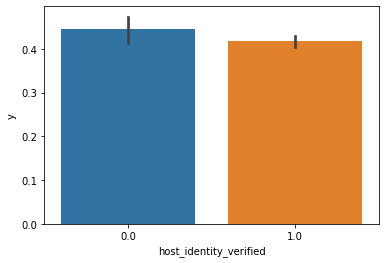

In [302]:
sns.barplot(x = 'host_identity_verified', y = 'y', data = data)

<AxesSubplot:xlabel='host_neighbourhood', ylabel='y'>

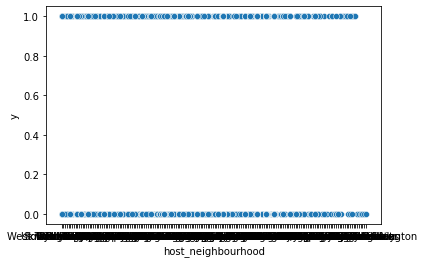

In [303]:
sns.scatterplot(x = 'host_neighbourhood', y = 'y',data = data)

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='y'>

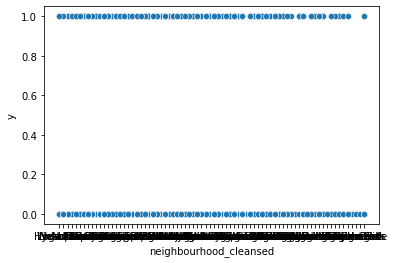

In [304]:
sns.scatterplot(data = data, x = "neighbourhood_cleansed",y="y")

<AxesSubplot:xlabel='property_type', ylabel='y'>

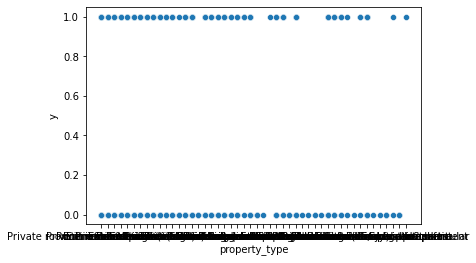

In [305]:
sns.scatterplot(data = data, x = "property_type",y="y")

<AxesSubplot:xlabel='room_type', ylabel='y'>

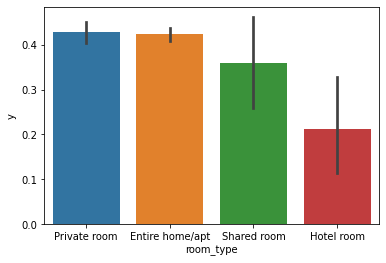

In [306]:
sns.barplot(x = 'room_type', y = 'y', data = data)

<AxesSubplot:xlabel='accommodates', ylabel='y'>

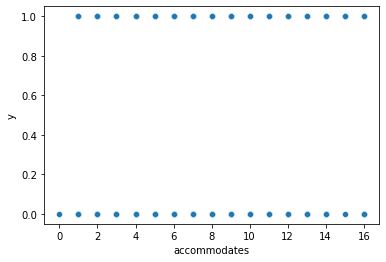

In [307]:
sns.scatterplot(x = 'accommodates', y = 'y', data = data)

<AxesSubplot:xlabel='Bathrooms', ylabel='y'>

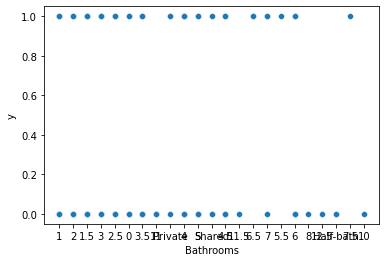

In [308]:
sns.scatterplot(data = data, x = "Bathrooms",y="y")

<AxesSubplot:xlabel='bedrooms', ylabel='y'>

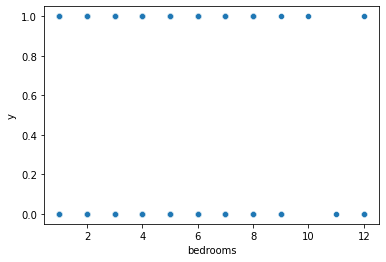

In [309]:
sns.scatterplot(data = data, x = "bedrooms",y="y")

<AxesSubplot:xlabel='beds', ylabel='y'>

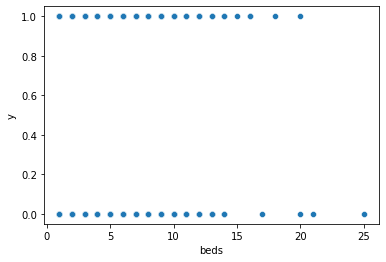

In [310]:
sns.scatterplot(data = data, x = "beds",y="y")

<AxesSubplot:xlabel='minimum_nights', ylabel='y'>

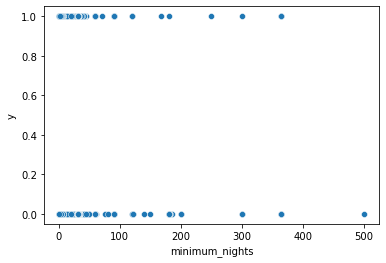

In [311]:
sns.scatterplot(data = data, x = "minimum_nights",y="y")

<AxesSubplot:xlabel='maximum_nights', ylabel='y'>

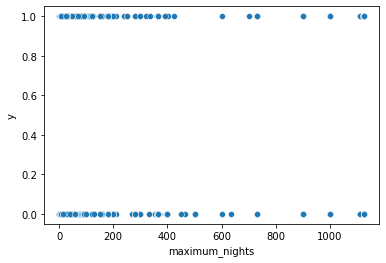

In [312]:
sns.scatterplot(data = data, x = "maximum_nights",y="y")

<AxesSubplot:xlabel='availability_365', ylabel='y'>

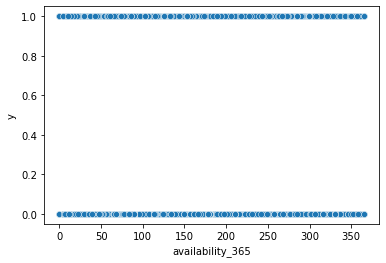

In [313]:
sns.scatterplot(data = data, x = "availability_365",y="y")

<AxesSubplot:xlabel='number_of_reviews', ylabel='y'>

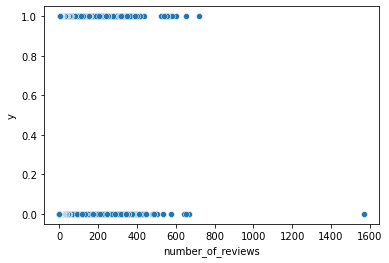

In [314]:
sns.scatterplot(data = data, x = "number_of_reviews",y="y")

<AxesSubplot:xlabel='number_of_reviews_ltm', ylabel='y'>

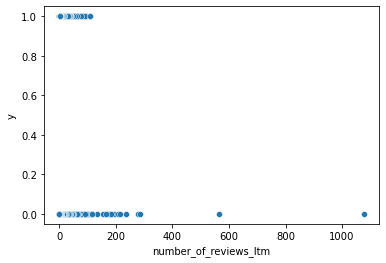

In [315]:
sns.scatterplot(data = data, x = "number_of_reviews_ltm",y="y")

<AxesSubplot:xlabel='number_of_reviews_l30d', ylabel='y'>

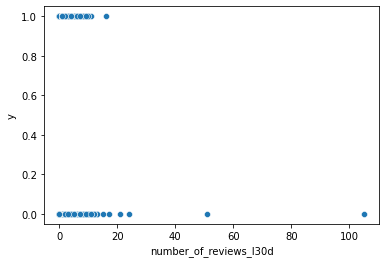

In [316]:
sns.scatterplot(data = data, x = "number_of_reviews_l30d",y="y")

<AxesSubplot:xlabel='reviews_per_month', ylabel='y'>

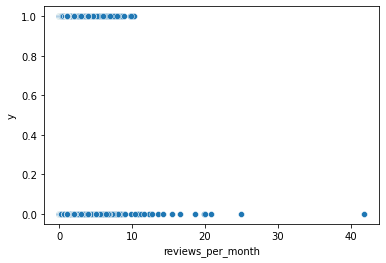

In [317]:
sns.scatterplot(data = data, x = "reviews_per_month",y="y")

<AxesSubplot:xlabel='instant_bookable', ylabel='y'>

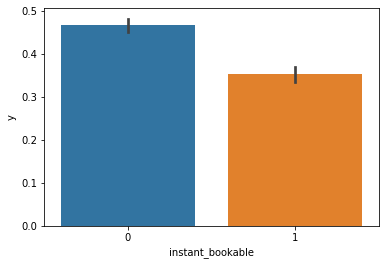

In [318]:
sns.barplot(data = data, x = "instant_bookable",y="y")

<AxesSubplot:xlabel='shampoo', ylabel='y'>

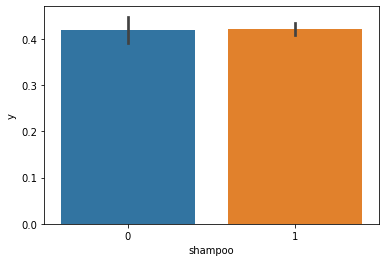

In [319]:
sns.barplot(data = data, x = "shampoo",y="y")

<AxesSubplot:xlabel='cooking basics', ylabel='y'>

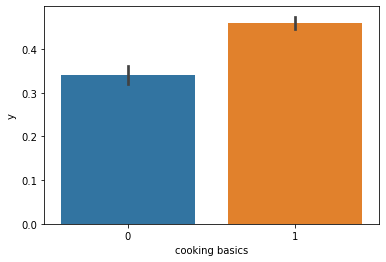

In [320]:
sns.barplot(data = data, x = "cooking basics",y="y")

<AxesSubplot:xlabel='hot water', ylabel='y'>

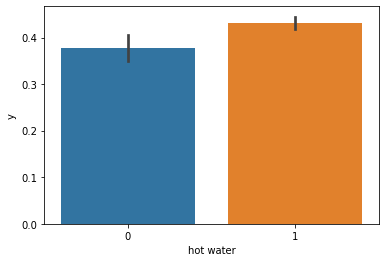

In [321]:
sns.barplot(data = data, x = "hot water",y="y")

<AxesSubplot:xlabel='iron', ylabel='y'>

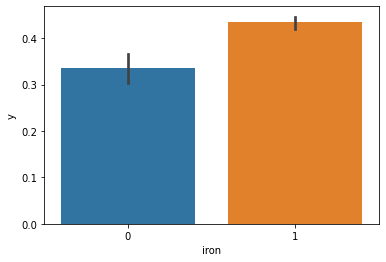

In [322]:
sns.barplot(data = data, x = "iron",y="y")

<AxesSubplot:xlabel='room darkening shades', ylabel='y'>

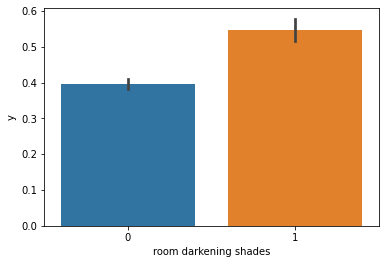

In [323]:
sns.barplot(data = data, x = "room darkening shades",y="y")

<AxesSubplot:xlabel='freezer', ylabel='y'>

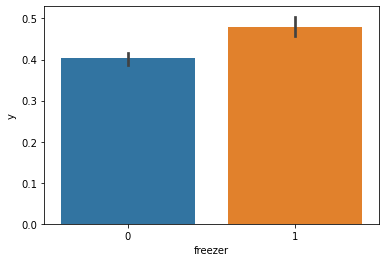

In [324]:
sns.barplot(data = data, x = "freezer",y="y")

<AxesSubplot:xlabel='wine glasses', ylabel='y'>

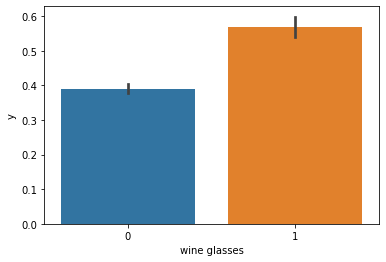

In [325]:
sns.barplot(data = data, x = "wine glasses",y="y")

<AxesSubplot:xlabel='essentials', ylabel='y'>

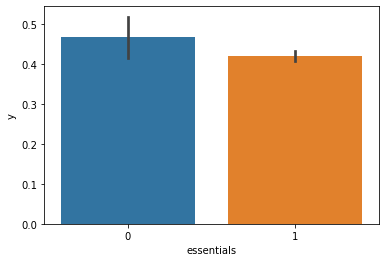

In [326]:
sns.barplot(data = data, x = "essentials",y="y")

<AxesSubplot:xlabel='coffee maker', ylabel='y'>

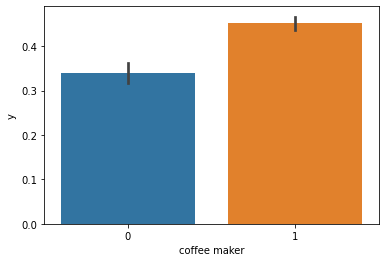

In [327]:
sns.barplot(data = data, x = "coffee maker",y="y")

<AxesSubplot:xlabel='heating', ylabel='y'>

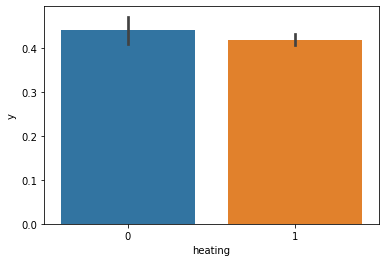

In [328]:
sns.barplot(data = data, x = "heating",y="y")

<AxesSubplot:xlabel='dishes and silverware', ylabel='y'>

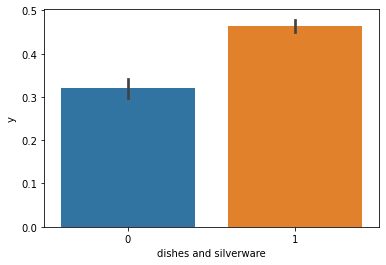

In [329]:
sns.barplot(data = data, x = "dishes and silverware",y="y")

<AxesSubplot:xlabel='shampoo', ylabel='y'>

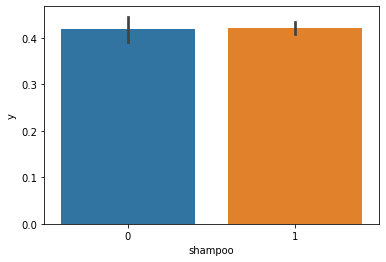

In [330]:
sns.barplot(data = data, x = "shampoo",y="y")

<AxesSubplot:xlabel='wifi', ylabel='y'>

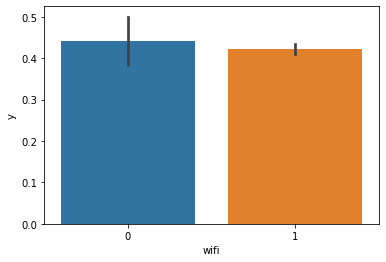

In [331]:
sns.barplot(data = data, x = "wifi",y="y")

<AxesSubplot:xlabel='bbq grill', ylabel='y'>

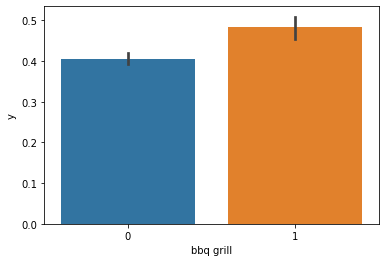

In [332]:
sns.barplot(data = data, x = "bbq grill",y="y")

<AxesSubplot:xlabel='cable tv', ylabel='y'>

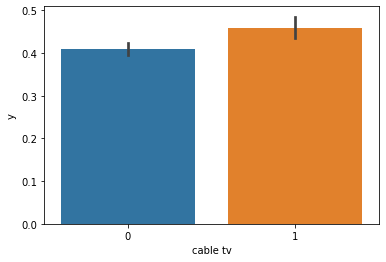

In [333]:
sns.barplot(data = data, x = "cable tv",y="y")

<AxesSubplot:xlabel='Cooking basics', ylabel='y'>

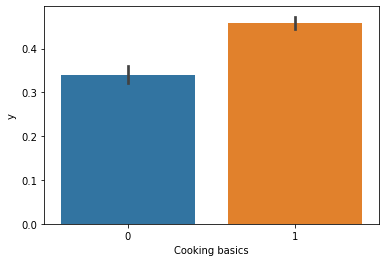

In [334]:
sns.barplot(data = data, x = "Cooking basics",y="y")

<AxesSubplot:xlabel='Hangers', ylabel='y'>

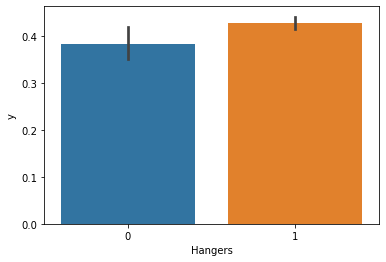

In [335]:
sns.barplot(data = data, x = "Hangers",y="y")

<AxesSubplot:xlabel='Private entrance', ylabel='y'>

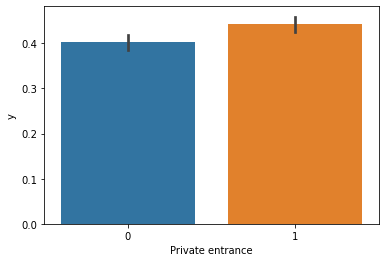

In [336]:
sns.barplot(data = data, x = "Private entrance",y="y")

<AxesSubplot:xlabel='Cooking basics', ylabel='y'>

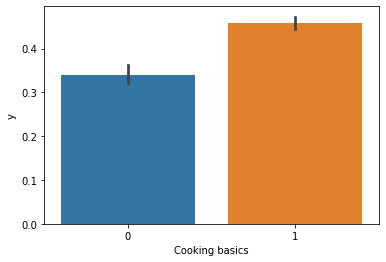

In [337]:
sns.barplot(data = data, x = "Cooking basics",y="y")

<AxesSubplot:xlabel='Free parking on premises', ylabel='y'>

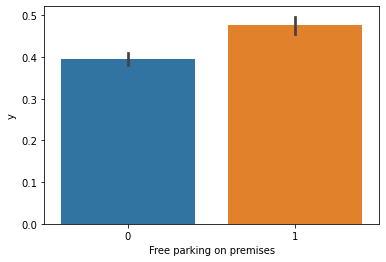

In [338]:
sns.barplot(data = data, x = "Free parking on premises",y="y")

<AxesSubplot:xlabel='Free street parking', ylabel='y'>

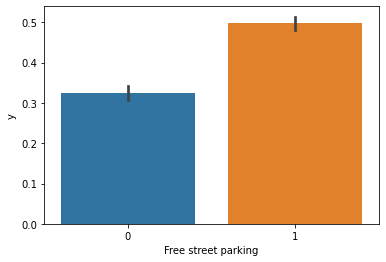

In [339]:
sns.barplot(data = data, x = "Free street parking",y="y")

<AxesSubplot:xlabel='Air conditioning', ylabel='y'>

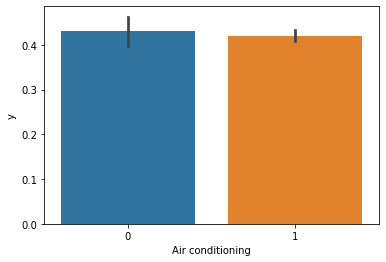

In [340]:
sns.barplot(data = data, x = "Air conditioning",y="y")

<AxesSubplot:xlabel='Microwave', ylabel='y'>

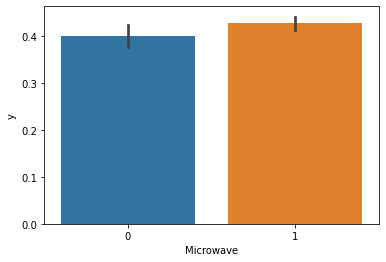

In [341]:
sns.barplot(data = data, x = "Microwave",y="y")

<AxesSubplot:xlabel='Fire extinguisher', ylabel='y'>

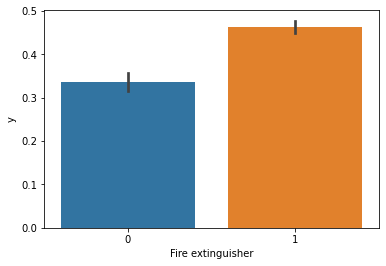

In [342]:
sns.barplot(data = data, x = "Fire extinguisher",y="y")

<AxesSubplot:xlabel='Shared patio or balcony', ylabel='y'>

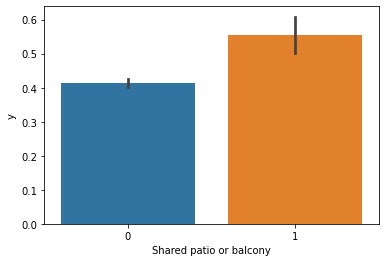

In [343]:
sns.barplot(data = data, x = "Shared patio or balcony",y="y")

<AxesSubplot:xlabel='Hair dryer', ylabel='y'>

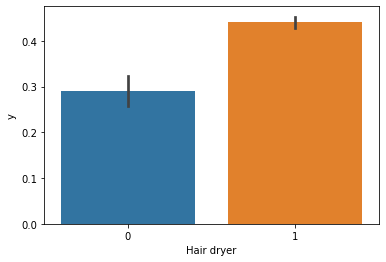

In [344]:
sns.barplot(data = data, x = "Hair dryer",y="y")

<AxesSubplot:xlabel='Stove', ylabel='y'>

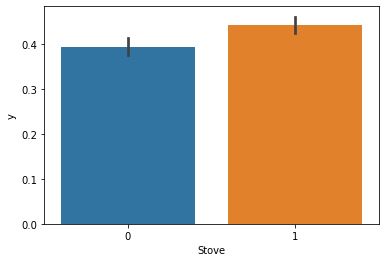

In [345]:
sns.barplot(data = data, x = "Stove",y="y")

<AxesSubplot:xlabel='Breakfast', ylabel='y'>

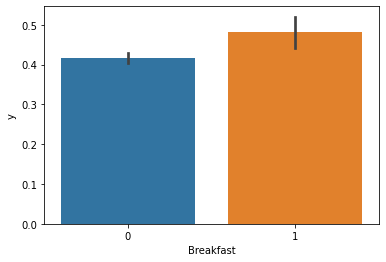

In [346]:
sns.barplot(data = data, x = "Breakfast",y="y")

<AxesSubplot:xlabel='Private patio or balcony', ylabel='y'>

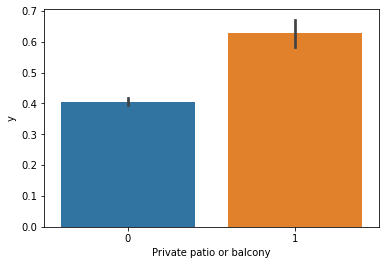

In [347]:
sns.barplot(data = data, x = "Private patio or balcony",y="y")

<AxesSubplot:xlabel='Full kitchen', ylabel='y'>

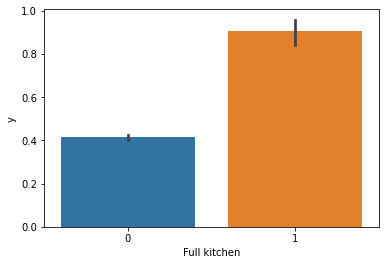

In [348]:
sns.barplot(data = data, x = "Full kitchen",y="y")

<AxesSubplot:xlabel='Lockbox', ylabel='y'>

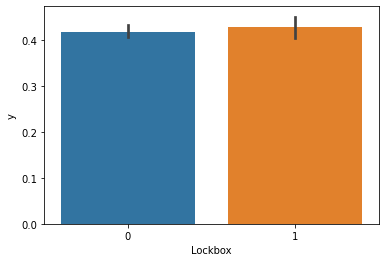

In [349]:
sns.barplot(data = data, x = "Lockbox",y="y")

<AxesSubplot:xlabel='Security cameras on property', ylabel='y'>

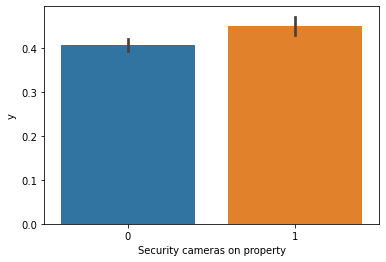

In [350]:
sns.barplot(data = data, x = "Security cameras on property",y="y")

<AxesSubplot:xlabel='Hot tub', ylabel='y'>

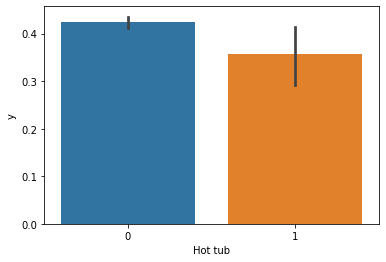

In [351]:
sns.barplot(data = data, x = "Hot tub",y="y")

<AxesSubplot:xlabel='Heating', ylabel='y'>

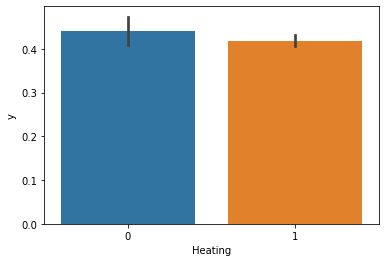

In [352]:
sns.barplot(data = data, x = "Heating",y="y")